In [44]:
import pandas as pd
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns

In [45]:
data_path = 'data/'

tino = pd.read_csv(data_path+'tarantino.csv')
tino['primary_key'] = tino.index

## If the curse word is used within 1 minute of the death, we will say it 'indicated' death.
Therefore, we only look for the deaths **after** a curse word is said.

In [55]:
tino['type_count'] = tino.groupby(['movie','type']).cumcount()+1

In [57]:
word = pysqldf("SELECT * FROM tino WHERE type='word'")
death = pysqldf("SELECT * FROM tino WHERE type='death'")

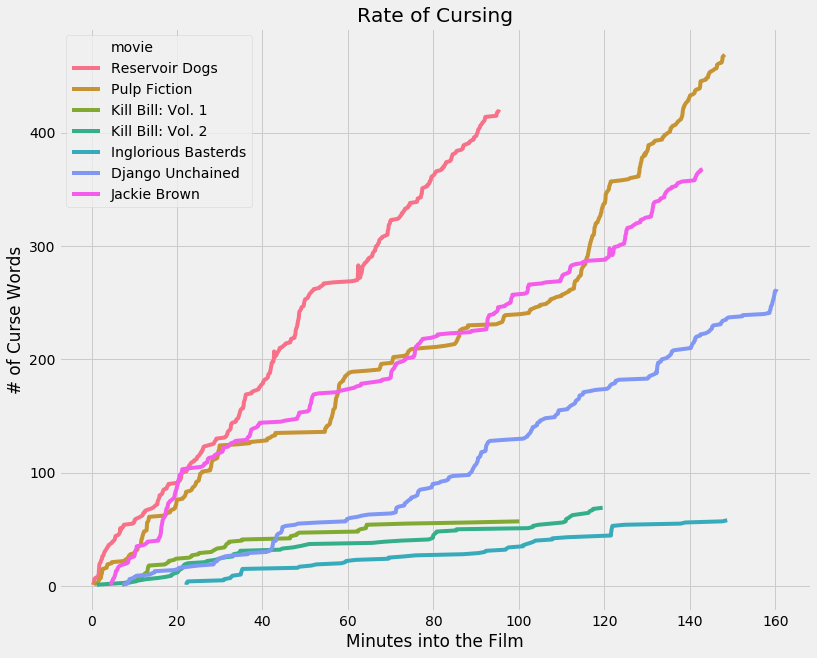

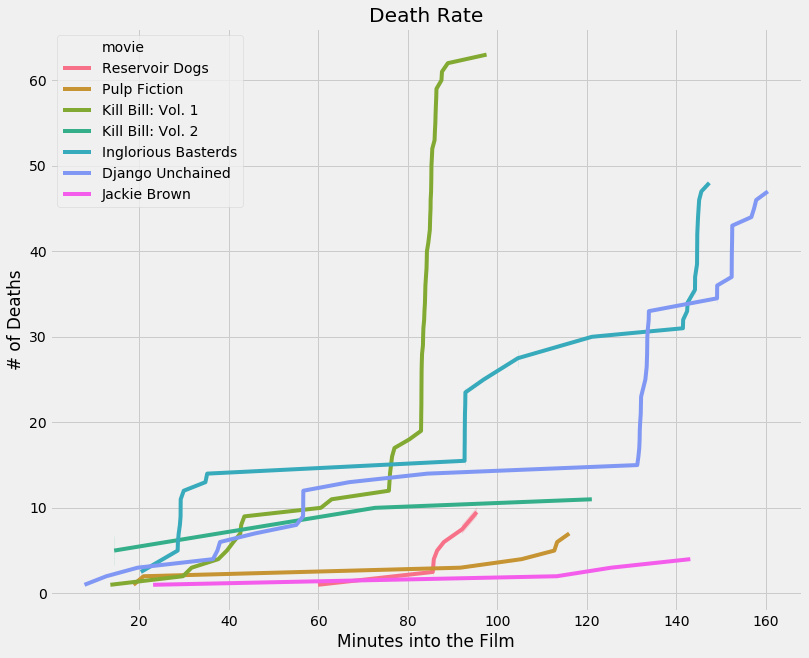

In [61]:
f, axes = plt.subplots(figsize=(12,10))
sns.lineplot(data=word,x='minutes_in',y='type_count',hue='movie')
plt.xlabel("Minutes into the Film")
plt.ylabel("# of Curse Words");
plt.title("Rate of Cursing")

f, axes = plt.subplots(figsize=(12,10))
sns.lineplot(data=death,x='minutes_in',y='type_count',hue='movie')
plt.xlabel("Minutes into the Film")
plt.ylabel("# of Deaths");
plt.title("Death Rate");